## **THE SPARKS FOUNDATION - GRIP TASK 1**

### Author: Priya Gupta, Data Science and Business Analytics Internship -The Sparks Foundation

### Task 1: Predict the percentage score of a student based on number of study hours

**Simple Linear Regression**
In this regression task I have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [33]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Loading Dataset

In [34]:
# Loading the dataset to pandas DataFrame from remote link
data = "http://bit.ly/w-data"
students_data = pd.read_csv(data)
students_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
students_data.shape

(25, 2)

In [36]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [37]:
#Checking for any missing values in the dataset
students_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

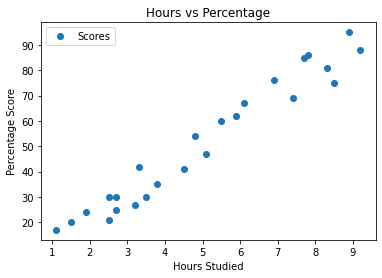

In [38]:
# Plotting the distribution of scores
students_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph it is clearly visible that as the number of hours increases the percentage score of the student also increases linearly. So there is positive linear relation between number of hours studied and percentage of score.**

## Preparing the Data

In [39]:
# X contains independent variable and y contains dependent variable
X = students_data.iloc[:, :-1].values
y = students_data.iloc[:, 1].values

In [40]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [41]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Splitting Dataset

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Model

In [43]:
from  sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#For retrieving the slope (coefficient of x)
print(model.coef_)

[9.91065648]


In [45]:
#For retrieving the intercept
print(model.intercept_)

2.018160041434662


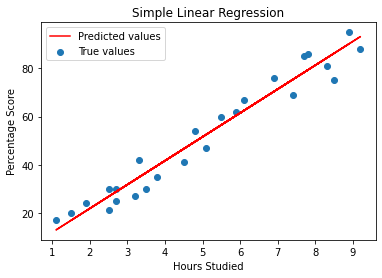

In [46]:
# Plotting the regression line
line = model.coef_*X+model.intercept_
# Plotting for the test data
plt.scatter(X, y,label="True values")
plt.plot(X, line,color="red",label="Predicted values")
plt.title('Simple Linear Regression')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

## Test Model(Making Predictions)

In [47]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [48]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
#Making prediction for input provided by the user
hours=float(input("Enter the number of hours studied:"))
input_data_as_numpy_array=np.asarray(hours)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
own_prediction=model.predict(input_data_reshaped)
print("No. of Hours studied:",hours)
print("Predicted Score:",own_prediction)

Enter the number of hours studied:9.25
No. of Hours studied: 9.25
Predicted Score: [93.69173249]


**We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 93.69.**

## Evaluating the Algorithm
The final step is to Evaluate our Algorithm i.e. how well our model performs.For evaluting you can use any one of the three metrics used below

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


Conculsion: You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.